The Dataset
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit. We are going to store this dataset in a variable called bank_data.

The columns we will use are:

age: The age of the person who received the phone call
default: Whether the person has credit in default
cons.price.idx: Consumer price index score at the time of the call
cons.conf.idx:Consumer confidence index score at the time of the call
y: Whether the person subscribed (this is what we’re trying to predict)

Importing Packages

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Random Forests Workflow
To fit and train this model, we’ll be following The Machine Learning Workflow infographic; however, as our data is pretty clean, we won’t be carrying out every step. We will do the following:

Feature engineering
Split the data
Train the model
Hyperparameter tuning
Assess model performance

Preprocessing Data for Random Forests
Tree-based models are much more robust to outliers than linear models, and they do not need variables to be normalized to work. As such, we need to do very little preprocessing on our data.

We will map our ‘default’ column, which contains no and yes, to 0s and 1s, respectively. We will treat unknown values as no for this example.
We will also map our target, y, to 1s and 0s.

In [2]:
bank_data=pd.read_csv(r"C:\Users\welcome\Downloads\VAC\bank_data.csv")

In [3]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1})
bank_data['Target'] = bank_data['Target'].map({'no':0,'yes':1})

Splitting the Data
When training any supervised learning model, it is important to split the data into training and test data. The training data is used to fit the model. The algorithm uses the training data to learn the relationship between the features and the target. The test data is used to evaluate the performance of the model.

The code below splits the data into separate variables for the features and target, then splits into training and test data.

In [5]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [6]:
X = bank_data.drop('Target', axis=1)
y = bank_data['Target']

Fitting and Evaluating the Model
We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
X_encoded = pd.get_dummies(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [10]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)


Accuracy: 0.8793541966161672


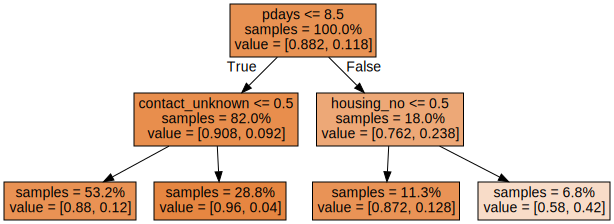

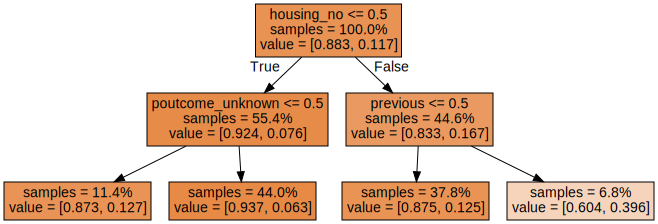

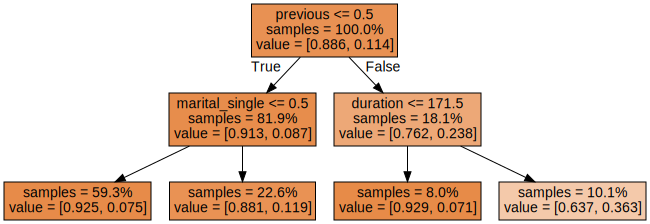

In [11]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Hyperparameter Tuning
The code below uses Scikit-Learn’s RandomizedSearchCV, which will randomly search parameters within a range per hyperparameter. We define the hyperparameters to use and their ranges in the param_dist dictionary. In our case, we are using:

n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

In [12]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BDC46B4A00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BDC40D3070>})

In [13]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 218}


More Evaluation Metrics
Let’s look at the confusion matrix. This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives (top right) and false negatives(bottom left) We can plot the confusion matrix using this code:

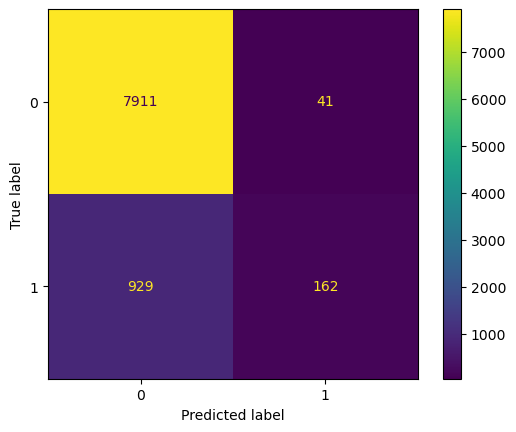

In [14]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Recall:", recall)
print("Accuracy:", accuracy)
print("Precision:", precision)

Recall: 0.2768102658111824
Accuracy: 0.8754837996240186
Precision: 0.4726134585289515


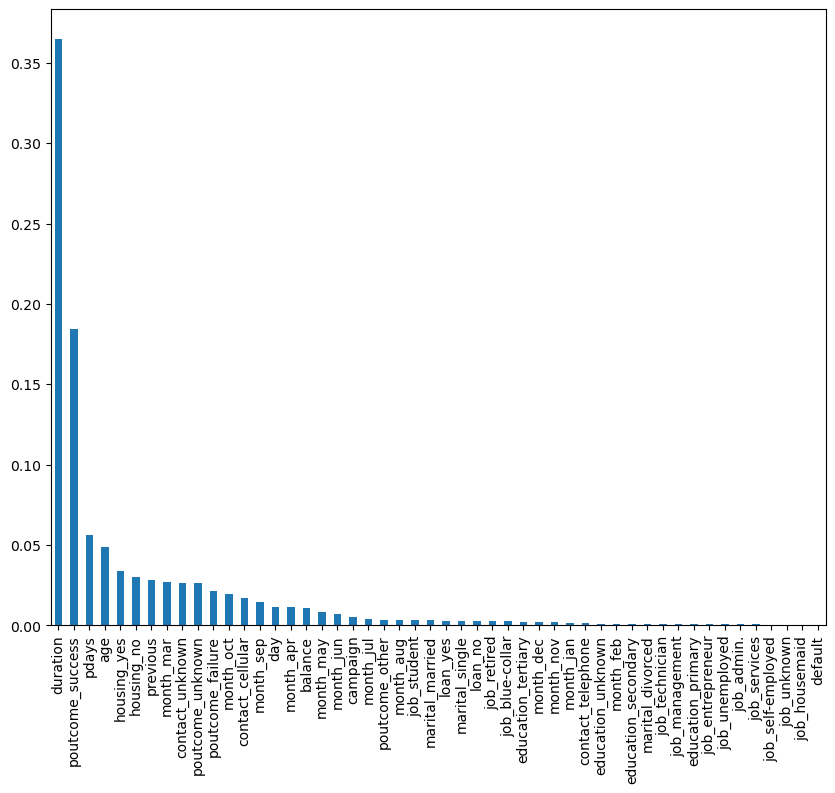

In [17]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.figure(figsize=(10, 8))
feature_importances.plot.bar();